# IQVIA Assessment: Coded by Sumeet Routray

IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from kmodes.kprototypes import KPrototypes
from plotnine import *
import plotnine

READING DATA

In [3]:
df = pd.read_excel("Q2_Dummy data - EXERCISE.xlsx", sheet_name= "DATA")

CREATION OF DERIVED VARIABLE & CONVERSION OF VARIABLES

In [4]:
#Converting to date-type
for col in ['claim_date','patient_dob']:
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

In [5]:
#Creating a derived variable "Age"
df['Patient_Age']= np.trunc((df['claim_date'] - df['patient_dob'])/np.timedelta64(1,'Y'))

In [6]:
df.head()

,patient_id,claim_id,claim_date,claim_amount,physician_id,diagnosis_code,procedure_code,patient_dob,DOB year,patient_gender,patient_race,Patient country,patient_has_cancer,patient_has_diabetes,Total money spent,Patient_Age
0,0057BAF42479AF6A,542412281632605,2009-07-22,50,5.056870e+09,72270,NaN,1942-05-01,1942,Female,White,USA,2,2,16580,67.0
1,0057BAF42479AF6A,542842280924481,2009-09-19,50,8.933392e+09,4019,NaN,1942-05-01,1942,Female,White,Germany,2,2,12897,67.0
2,0097F42825586D59,542892281178580,2009-06-11,200,3.274116e+08,6108,NaN,1921-07-01,1921,Female,White,France,2,2,13049,87.0
3,0097F42825586D59,542042281368648,2009-10-22,60,4.022239e+09,38653,NaN,1921-07-01,1921,Female,White,UK,2,2,14002,88.0
4,0097F42825586D59,542292281274912,2010-03-03,10,6.845115e+09,7140,NaN,1921-07-01,1921,Female,White,Italy,2,2,19684,88.0


In [7]:
df.shape

(1838, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   patient_id            1838 non-null   object        
 1   claim_id              1838 non-null   int64         
 2   claim_date            1838 non-null   datetime64[ns]
 3   claim_amount          1838 non-null   int64         
 4   physician_id          1817 non-null   float64       
 5   diagnosis_code        1838 non-null   object        
 6   procedure_code        1 non-null      float64       
 7   patient_dob           1838 non-null   datetime64[ns]
 8   DOB year              1838 non-null   int64         
 9   patient_gender        1838 non-null   object        
 10  patient_race          1838 non-null   object        
 11  Patient country       1838 non-null   object        
 12  patient_has_cancer    1838 non-null   int64         
 13  patient_has_diabet

In [9]:
#Converting to Categorical/String type
df['patient_has_cancer']=df["patient_has_cancer"].astype(str)
df['patient_has_diabetes']=df["patient_has_diabetes"].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   patient_id            1838 non-null   object        
 1   claim_id              1838 non-null   int64         
 2   claim_date            1838 non-null   datetime64[ns]
 3   claim_amount          1838 non-null   int64         
 4   physician_id          1817 non-null   float64       
 5   diagnosis_code        1838 non-null   object        
 6   procedure_code        1 non-null      float64       
 7   patient_dob           1838 non-null   datetime64[ns]
 8   DOB year              1838 non-null   int64         
 9   patient_gender        1838 non-null   object        
 10  patient_race          1838 non-null   object        
 11  Patient country       1838 non-null   object        
 12  patient_has_cancer    1838 non-null   object        
 13  patient_has_diabet

In [11]:
df['patient_has_cancer'].unique()

array(['2', '1'], dtype=object)

In [12]:
#Checking for unique values
df.select_dtypes('object').nunique()

patient_id               546
diagnosis_code          1201
patient_gender             2
patient_race               4
Patient country            7
patient_has_cancer         2
patient_has_diabetes       2
dtype: int64

In [13]:
df[['claim_amount','Total money spent','Patient_Age']].describe()

,claim_amount,Total money spent,Patient_Age
count,1838.000000,1838.000000,1838.000000
mean,246.158868,9715.233950,72.689336
std,511.401035,5786.996441,12.665359
min,-90.000000,11.000000,26.000000
25%,40.000000,4650.000000,67.000000
50%,80.000000,9618.500000,73.000000
75%,200.000000,14657.500000,81.000000
max,3300.000000,19997.000000,100.000000


In [14]:
#Checking for missing values
df[['claim_amount','Total money spent','Patient_Age','patient_gender','patient_race','Patient country','patient_has_cancer','patient_has_diabetes']].isna().sum()

claim_amount            0
Total money spent       0
Patient_Age             0
patient_gender          0
patient_race            0
Patient country         0
patient_has_cancer      0
patient_has_diabetes    0
dtype: int64

In [15]:
df_num_var=df[['claim_amount','Total money spent','Patient_Age']]
df_cat_var=df[['patient_gender','patient_race','Patient country','patient_has_cancer','patient_has_diabetes']]

SCALING NUMERIC VARIABLES & FORMING K-PROTO CLUSTERS

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#Scaling the numeric variables
scaler=StandardScaler()
scaler.fit(df_num_var)
scaled_features=scaler.transform(df_num_var)
scaled_features

array([[-0.3836759 ,  1.18656273, -0.44932673],
       [-0.3836759 ,  0.54996266, -0.44932673],
       [-0.09028419,  0.57623559,  1.13021336],
       ...,
       [-0.09028419, -0.68037111,  0.81430534],
       [-0.09028419,  1.21197142,  0.89328234],
       [-0.28587866,  0.77380113,  0.81430534]])

In [18]:
df_num_var=pd.DataFrame(scaled_features,columns=df_num_var.columns)

In [19]:
df_num_var.head()

,claim_amount,Total money spent,Patient_Age
0,-0.383676,1.186563,-0.449327
1,-0.383676,0.549963,-0.449327
2,-0.090284,0.576236,1.130213
3,-0.364116,0.740960,1.209190
4,-0.461914,1.723084,1.209190


In [20]:
df_final=pd.concat([df_num_var,df_cat_var],axis=1) #Concatenating numeric with categorical variables

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_amount          1838 non-null   float64
 1   Total money spent     1838 non-null   float64
 2   Patient_Age           1838 non-null   float64
 3   patient_gender        1838 non-null   object 
 4   patient_race          1838 non-null   object 
 5   Patient country       1838 non-null   object 
 6   patient_has_cancer    1838 non-null   object 
 7   patient_has_diabetes  1838 non-null   object 
dtypes: float64(3), object(5)
memory usage: 115.0+ KB


In [22]:
# Get the position of categorical columns
catColumnsPos = [df_final.columns.get_loc(col) for col in list(df_final.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_final.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['patient_gender', 'patient_race', 'Patient country', 'patient_has_cancer', 'patient_has_diabetes']
Categorical columns position  : [3, 4, 5, 6, 7]


In [23]:
dfMatrix = df_final.to_numpy()

In [24]:
#Finding optimal Clusters using K-proto
cost = []
for cluster in range(1, 21):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20


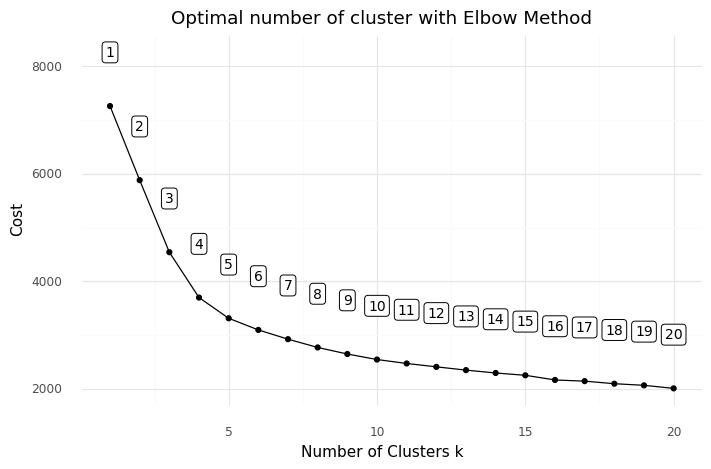

<ggplot: (140338709267)>

In [25]:
# Converting the results into a dataframe and plotting them
# Choose optimal K using Elbow method
df_cost = pd.DataFrame({'Cluster':range(1, 21), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [26]:
#Fitting the CLusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 2, 2, ..., 3, 2, 2], dtype=uint16)

In [27]:
# Clusters' centorid
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[['-0.197656555934817' '-0.0956479338341232' '-1.8619907248685943'
  'Female' 'White' 'Germany' '2' '1']
 ['4.127535024075164' '-0.019532400825725073' '-0.21644582259274628'
  'Male' 'White' 'Italy' '2' '2']
 ['-0.19128833035355197' '0.9242739536250312' '0.28832704960146616'
  'Female' 'White' 'Germany' '2' '2']
 ['-0.17054537319095908' '-0.8400137858550597' '0.31815222835242224'
  'Female' 'White' 'Germany' '2' '2']]
7
3696.977015764255


In [28]:
# Add the clusters to the dataframe
df['Cluster Labels'] = kprototype.labels_
df['Cluster Labels'].unique()

array([2, 3, 0, 1], dtype=uint16)

In [29]:
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'})

In [30]:
print(df['Segment'].value_counts())
df.head()

Fourth    783
Third     738
First     239
Second     78
Name: Segment, dtype: int64


,patient_id,claim_id,claim_date,claim_amount,physician_id,diagnosis_code,procedure_code,patient_dob,DOB year,patient_gender,patient_race,Patient country,patient_has_cancer,patient_has_diabetes,Total money spent,Patient_Age,Cluster Labels,Segment
0,0057BAF42479AF6A,542412281632605,2009-07-22,50,5.056870e+09,72270,NaN,1942-05-01,1942,Female,White,USA,2,2,16580,67.0,2,Third
1,0057BAF42479AF6A,542842280924481,2009-09-19,50,8.933392e+09,4019,NaN,1942-05-01,1942,Female,White,Germany,2,2,12897,67.0,2,Third
2,0097F42825586D59,542892281178580,2009-06-11,200,3.274116e+08,6108,NaN,1921-07-01,1921,Female,White,France,2,2,13049,87.0,2,Third
3,0097F42825586D59,542042281368648,2009-10-22,60,4.022239e+09,38653,NaN,1921-07-01,1921,Female,White,UK,2,2,14002,88.0,2,Third
4,0097F42825586D59,542292281274912,2010-03-03,10,6.845115e+09,7140,NaN,1921-07-01,1921,Female,White,Italy,2,2,19684,88.0,2,Third


CLUSTERS INTERPRETATION

In [32]:
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third','Fourth'])

                 sum_sq      df           F         PR(>F)
Segment   155975.610292     3.0  687.477212  1.956031e-299
Residual  138700.000698  1834.0         NaN            NaN
AxesSubplot(0.125,0.125;0.775x0.755)


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Second-First,20.835747,1.134023,18.373299,2.438942e-69,18.611635,23.059860,0.000000e+00,True
Third-First,27.227138,0.647230,42.067168,2.685100e-271,25.957752,28.496523,0.000000e+00,True
Fourth-First,27.604782,0.642664,42.953656,1.517026e-279,26.344351,28.865212,0.000000e+00,True
Third-Second,6.391390,1.035400,6.172871,8.235118e-10,4.360704,8.422077,1.647023e-09,True
Fourth-Second,6.769034,1.032552,6.555635,7.181192e-11,4.743933,8.794136,2.154357e-10,True
Fourth-Third,0.377644,0.446164,0.846425,3.974263e-01,-0.497398,1.252686,3.974263e-01,False


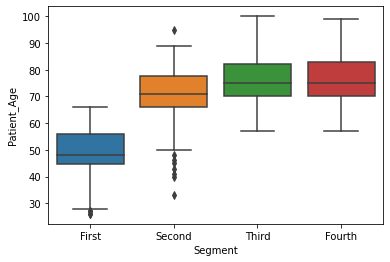

In [33]:
#Using Anova to check for variable 'Patient_Age'
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Patient_Age ~ Segment',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Boxplot
print(sns.boxplot(x='Segment', y='Patient_Age', data=df))

#Pair-wise comparisons
pair_t = mod.t_test_pairwise('Segment')
pair_t.result_frame

                sum_sq      df            F  PR(>F)
Segment   3.966927e+10     3.0  1109.860728     0.0
Residual  2.185062e+10  1834.0          NaN     NaN
AxesSubplot(0.125,0.125;0.775x0.755)


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Second-First,440.360476,450.106854,0.978347,3.280320e-01,-442.415335,1323.136288,0.328032,False
Third-First,5900.678488,256.893075,22.969395,7.997455e-103,5396.844807,6404.512168,0.000000,True
Fourth-First,-4306.470548,255.080854,-16.882767,1.493378e-59,-4806.749996,-3806.191100,0.000000,True
Third-Second,5460.318011,410.962168,13.286668,1.571457e-38,4654.315040,6266.320982,0.000000,True
Fourth-Second,-4746.831025,409.831787,-11.582389,5.441389e-30,-5550.617027,-3943.045022,0.000000,True
Fourth-Third,-10207.149036,177.087453,-57.639030,0.000000e+00,-10554.463276,-9859.834795,0.000000,True


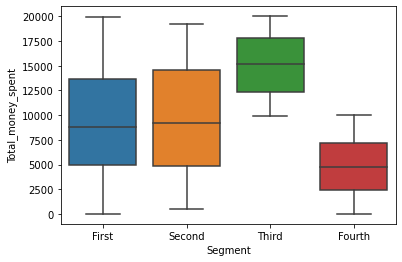

In [34]:
#Using Anova to check for variable 'Total_money_spent'
df.rename(columns = {'Total money spent':'Total_money_spent'}, inplace = True)
mod = ols('Total_money_spent ~ Segment',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#Boxplot
print(sns.boxplot(x='Segment', y='Total_money_spent', data=df))

#Pair-wise comparisons
pair_t = mod.t_test_pairwise('Segment')
pair_t.result_frame

In [35]:
#Checking for 'claim_amount'
mod = ols('claim_amount ~ Segment',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

pair_t = mod.t_test_pairwise('Segment')
pair_t.result_frame

                sum_sq      df            F  PR(>F)
Segment   3.627987e+08     3.0  1885.436529     0.0
Residual  1.176337e+08  1834.0          NaN     NaN


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Second-First,2211.305654,33.025521,66.957480,0.000000,2146.534076,2276.077232,0.000000,True
Third-First,3.255831,18.848919,0.172733,0.862880,-33.711768,40.223430,0.862880,False
Fourth-First,13.860915,18.715952,0.740594,0.459035,-22.845901,50.567731,0.799281,False
Third-Second,-2208.049823,30.153373,-73.227292,0.000000,-2267.188376,-2148.911270,0.000000,True
Fourth-Second,-2197.444739,30.070434,-73.076590,0.000000,-2256.420627,-2138.468851,0.000000,True
Fourth-Third,10.605084,12.993371,0.816192,0.414496,-14.878274,36.088441,0.799281,False


In [36]:
from statsmodels.multivariate.manova import MANOVA

In [37]:
maov = MANOVA.from_formula(' Patient_Age + Total_money_spent + claim_amount ~ Segment', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1625 3.0000 1832.0000 3147.5303 0.0000
         Pillai's trace 0.8375 3.0000 1832.0000 3147.5303 0.0000
 Hotelling-Lawley trace 5.1543 3.0000 1832.0000 3147.5303 0.0000
    Roy's greatest root 5.1543 3.0000 1832.0000 3147.5303 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Segment         Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.0410 9.0000 4458.7572 1345.6525 0.0000
         Pillai's trace 1.9281 9.0000 5502.00

In [38]:
#CHISQUARE TESTS
from scipy.stats import chi2_contingency
l=['patient_gender','patient_race','Patient country','patient_has_cancer','patient_has_diabetes']
for i in range(0,len(l)):
    dt=pd.crosstab(index=df['Segment'], columns=df[l[i]]) #Creating a contingency table
    #Checking null hypothesis is approved or rejected
    data = dt
    stat, p, dof, expected = chi2_contingency(data)
  
    # interpret p-value
    alpha = 0.05
    print("p value for " + str(l[i]) + " is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')    

p value for patient_gender is 0.3768829572797424
Independent (H0 holds true)
p value for patient_race is 8.775196878768268e-09
Dependent (reject H0)
p value for Patient country is 0.6534650283851371
Independent (H0 holds true)
p value for patient_has_cancer is 0.023235501647429057
Dependent (reject H0)
p value for patient_has_diabetes is 0.0003143773623296378
Dependent (reject H0)


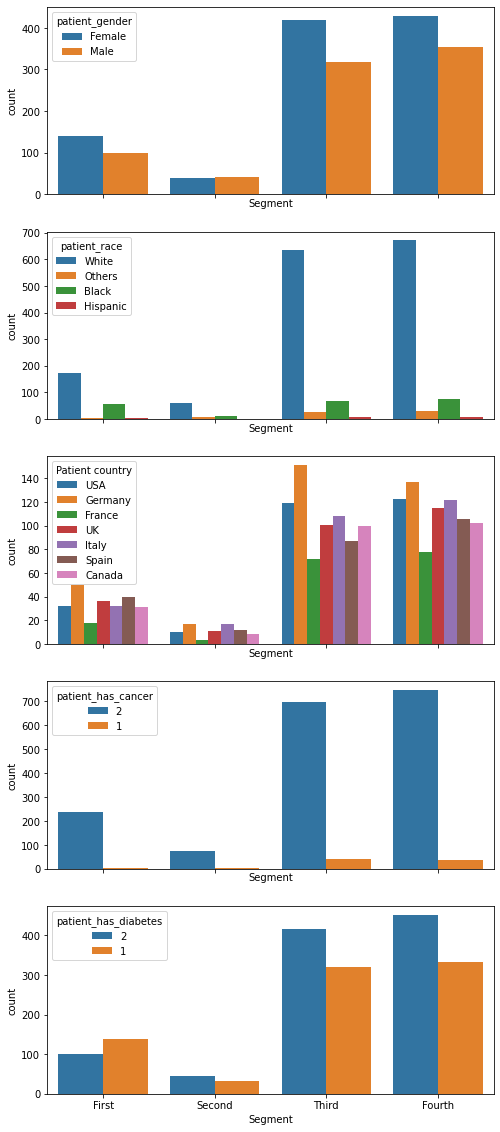

In [39]:
# sns.countplot(x='Segment',hue='patient_gender',data=df)  
n=len(l)
fig,ax = plt.subplots(n,1, figsize=(8,n*4), sharex=True)
for i in range(0, n):
    plt.sca(ax[i])
    sns.countplot(x='Segment',hue=l[i],data=df)

CLUSTEROIDS

In [41]:
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)

In [42]:
df.groupby('Segment').agg(
    {
        'Total':'count',
        'claim_amount': 'mean',
        'Total_money_spent': 'mean',
        'Patient_Age': 'mean',
        'patient_gender': lambda x: x.value_counts().index[0],
        'patient_race': lambda x: x.value_counts().index[0],
        'Patient country': lambda x: x.value_counts().index[0],
        'patient_has_cancer': lambda x: x.value_counts().index[0],
        'patient_has_diabetes': lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,Total,claim_amount,Total_money_spent,Patient_Age,patient_gender,patient_race,Patient country,patient_has_cancer,patient_has_diabetes
0,First,239,145.104603,9161.870293,49.112971,Female,White,Germany,2,1
1,Second,78,2356.410256,9602.230769,69.948718,Male,White,Italy,2,2
2,Third,738,148.360434,15062.548780,76.340108,Female,White,Germany,2,2
3,Fourth,783,158.965517,4855.399745,76.717752,Female,White,Germany,2,2


# ----------------- End of Code------------------